<a href="https://colab.research.google.com/github/ankitakhakhal/Cointegration-and-Causality/blob/main/Cointegration_and_Causality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Cointegration**

In [1]:
import pandas as pd
from statsmodels.tsa.stattools import coint
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
import statsmodels
print(statsmodels.__version__)

0.14.1


In [2]:
from google.colab import files
uploaded = files.upload()

Saving TestingData.xlsx to TestingData.xlsx


In [3]:
import io
# file_name = list(uploaded.keys())[0]
# data = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='latin1')
data = pd.read_excel(io.BytesIO(uploaded['TestingData.xlsx']))

In [4]:
import numpy as np
data = data.replace([np.nan, np.inf], 0)
# data = data.dropna()

Cointegration test and matrix

In [5]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

if 'timestamp' in data.columns:
    data = data.drop(columns=['timestamp'])

def johansen_cointegration_test(data, det_order=0, k_ar_diff=1):
    """
    Perform the Johansen cointegration test on multivariate time series data.

    Parameters:
    - data: DataFrame containing the variables to test for cointegration.
    - det_order: Order of deterministic terms (default is 0).
    - k_ar_diff: Number of lagged differences (default is 1).

    Returns:
    - result: Johansen cointegration test result object.
    """
    # Exclude non-numeric columns
    data_numeric = data.select_dtypes(include=['float64', 'int64'])

    # Perform the Johansen cointegration test
    result = coint_johansen(data, det_order=det_order, k_ar_diff=k_ar_diff)

    return result

# Example usage:
# Assuming you have already loaded your data into a DataFrame named 'data'
# and set the appropriate parameters for the test
johansen_result = johansen_cointegration_test(data)

In [6]:
print(johansen_result.cvt)

[[190.8714 197.3772 210.0366]
 [153.6341 159.529  171.0905]
 [120.3673 125.6185 135.9825]
 [ 91.109   95.7542 104.9637]
 [ 65.8202  69.8189  77.8202]
 [ 44.4929  47.8545  54.6815]
 [ 27.0669  29.7961  35.4628]
 [ 13.4294  15.4943  19.9349]
 [  2.7055   3.8415   6.6349]]


In [7]:
print(johansen_result.trace_stat)

[7115.550785   6036.58321524 5155.014893   4293.16464002 3502.48565858
 2733.45777583 2011.24144707 1310.99515749  625.63978098]


In [8]:
print(johansen_result.cvm)

[[55.2412 58.4332 64.996 ]
 [49.2855 52.3622 58.6634]
 [43.2947 46.2299 52.3069]
 [37.2786 40.0763 45.8662]
 [31.2379 33.8777 39.3693]
 [25.1236 27.5858 32.7172]
 [18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


In [9]:
print(johansen_result.max_eig_stat)

[1078.96756976  881.56832224  861.85025298  790.67898144  769.02788275
  722.21632876  700.24628958  685.35537651  625.63978098]


In [46]:
print(johansen_result.eig)

[0.51977117 0.45080332 0.44339204 0.4157996  0.40713738 0.38796734
 0.37875776 0.37243699 0.34643675]


In [15]:
# Convert column names to a list
variables = list(data.columns)

# Check the length of the list
print(len(variables))

9


In [18]:
variables = list(data.columns)

# Extract trace statistic, max eigenvalue statistic, and critical values
trace_statistic = johansen_result.trace_stat
max_eigenvalue_statistic = johansen_result.max_eig_stat
critical_values_trace = johansen_result.cvt
critical_values_max_eigen = johansen_result.cvm

# Compare trace statistic with critical values
cointegrated_variables_trace = []

for i in range(len(variables)):
    if trace_statistic[i] > critical_values_trace[i][1]:
        cointegrated_variables_trace.append(variables[i])


# Compare max eigenvalue statistic with critical values
cointegrated_variables_max_eigen = []

for i in range(len(variables)):
    if max_eigenvalue_statistic[i] > critical_values_max_eigen[i][1]:
        cointegrated_variables_max_eigen.append(variables[i])


# Interpretation of results
if cointegrated_variables_trace and cointegrated_variables_max_eigen:
    print("Both trace statistic and maximum eigenvalue statistic indicate evidence of cointegration.")
    print("Variables cointegrated based on Trace Statistic:", cointegrated_variables_trace)
    print("Variables cointegrated based on Maximum Eigenvalue Statistic:", cointegrated_variables_max_eigen)
    # If both statistics indicate evidence of cointegration, you may proceed to analyze the cointegrated relationships.
elif cointegrated_variables_trace or cointegrated_variables_max_eigen:
    print("Only one of the statistics indicates evidence of cointegration.")
    print("Variables cointegrated based on Trace Statistic:", cointegrated_variables_trace)
    print("Variables cointegrated based on Maximum Eigenvalue Statistic:", cointegrated_variables_max_eigen)
    # If only one statistic indicates evidence of cointegration, further examination may be necessary.
else:
    print("Neither statistic exceeds its critical value, suggesting insufficient evidence to conclude that the variables are cointegrated.")

Both trace statistic and maximum eigenvalue statistic indicate evidence of cointegration.
Variables cointegrated based on Trace Statistic: ['Xaurum', 'MyBit', 'Santiment Network', 'Wings', 'HedgeTrade', 'Polybius', 'Ormeus', 'MicroMoney', 'Neumark']
Variables cointegrated based on Maximum Eigenvalue Statistic: ['Xaurum', 'MyBit', 'Santiment Network', 'Wings', 'HedgeTrade', 'Polybius', 'Ormeus', 'MicroMoney', 'Neumark']


Cointegration network

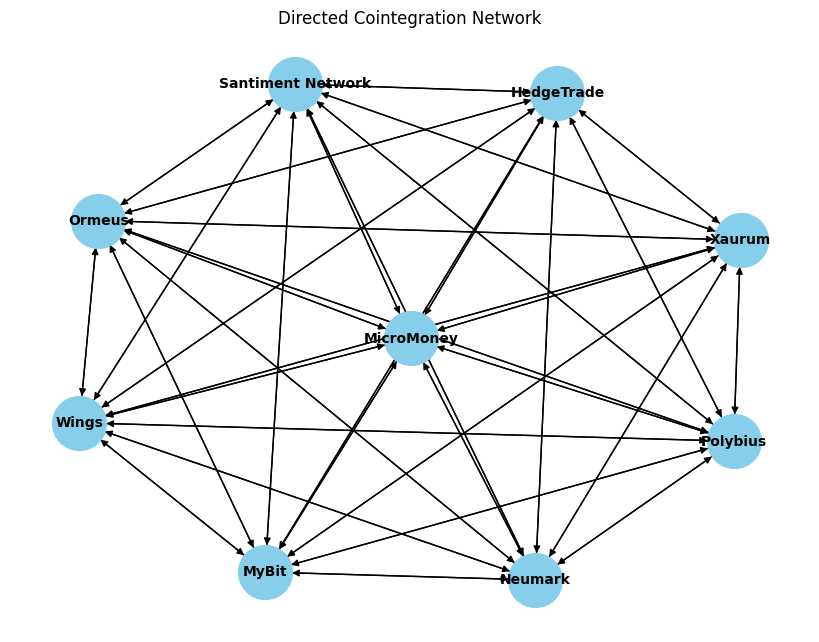

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a new directed graph for the cointegration network
G = nx.DiGraph()

# Add nodes (variables) to the graph
for variable in variables:
    G.add_node(variable)

# Add directed edges based on cointegration results
for variable1 in cointegrated_variables_trace:
    for variable2 in cointegrated_variables_trace:
        if variable1 != variable2:
            G.add_edge(variable1, variable2)

# Visualize the directed cointegration network
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, font_size=10, font_weight='bold', arrows=True)
plt.title('Directed Cointegration Network')
plt.show()


**2. Granger Causality**

Method I

In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.vector_ar.var_model import VAR
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving samplereturn.xlsx to samplereturn.xlsx


In [3]:
import io
data = pd.read_excel(io.BytesIO(uploaded['samplereturn.xlsx']))

In [4]:
data = data.replace([np.nan, np.inf], 0)

In [ ]:
data.head()

In [ ]:
# Drop the 'date' column if present
if 'timestamp' in data.columns:
    data = data.drop(columns=['timestamp'])
data.head()

In [6]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data):
    stationary_vars = []
    for col in data.columns:
        result = adfuller(data[col])
        p_value = result[1]
        if p_value < 0.05:  # Adjust the threshold as needed
            stationary_vars.append(col)
    return stationary_vars

# Assuming 'data' is your DataFrame containing the time series data
stationary_variables = check_stationarity(data)

print("Stationary Variables:")
print(stationary_variables)


Stationary Variables:
['Xaurum', 'MyBit', 'Santiment Network', 'Wings', 'HedgeTrade', 'Polybius', 'Ormeus', 'MicroMoney', 'Neumark', 'SwissBorg', 'Numeraire', 'Uquid', 'Wirex', 'Enzyme', 'Voyager', 'Divi', 'Valor Token', 'Nash', 'Humaniq', 'Tokenbox', 'Autonio', 'Zeusshield', 'CoinFi', 'Metaverse ETP', 'TokenClub']


In [ ]:
print(data[stationary_variables])

In [10]:
# Import the VAR model and information criteria module
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults

max_lag=10

# Fit VAR models with different lag orders and select the one with the lowest AIC
best_aic = float('inf')
best_model = None
best_lag = None

for lag in range(1, max_lag + 1):
    model = VAR(data)
    results = model.fit(lag, ic='aic')
    current_aic = results.aic

    if current_aic < best_aic:
        best_aic = current_aic
        best_model = results
        best_lag = lag

print(f"Best lag order selected based on AIC: {best_lag}")
print(f"AIC value for the best model: {best_aic}")

Best lag order selected based on AIC: 1
AIC value for the best model: -97.74301719484657


In [16]:
model = VAR(data[stationary_variables])
results = model.fit(maxlags=8, ic='aic')
print(results.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 09, Feb, 2024
Time:                     17:00:02
--------------------------------------------------------------------
No. of Equations:         25.0000    BIC:                   -95.4051
Nobs:                     1472.00    HQIC:                  -96.8713
Log likelihood:           20371.9    FPE:                3.55457e-43
AIC:                     -97.7430    Det(Omega_mle):     2.29449e-43
--------------------------------------------------------------------
Results for equation Xaurum
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.009272         0.003306            2.805           0.005
L1.Xaurum                   -0.261838         0.025673          -10.199           0.000
L1.MyBit                    -0.

In [14]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Fit VAR model to your multivariate time series data
model = VAR(data)
results = model.fit()

# Get the names of the variables in your dataset
variables = data.columns

# Perform Granger causality tests for each variable pair
causality_results = {}
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            # Perform Granger causality test for var1 causing var2
            granger_test_result = results.test_causality(var1, [var2])
            causality_results[(var1, var2)] = granger_test_result

# Print or store the results as needed
for pair, result in causality_results.items():
    print(f"Causality Test for {pair}: {result}")


Causality Test for ('Xaurum', 'MyBit'): <statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: MyBit does not Granger-cause Xaurum: fail to reject at 5% significance level. Test statistic: 0.000, critical value: 3.842>, p-value: 0.984>
Causality Test for ('Xaurum', 'Santiment Network'): <statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: Santiment Network does not Granger-cause Xaurum: fail to reject at 5% significance level. Test statistic: 0.146, critical value: 3.842>, p-value: 0.703>
Causality Test for ('Xaurum', 'Wings'): <statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: Wings does not Granger-cause Xaurum: fail to reject at 5% significance level. Test statistic: 1.216, critical value: 3.842>, p-value: 0.270>
Causality Test for ('Xaurum', 'HedgeTrade'): <statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: HedgeTrade does not Granger-cause Xaurum: fail t

In [17]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Fit VAR model to your multivariate time series data
# model = VAR(data)
# results = model.fit()

# Get the names of the variables in your dataset
variables = data.columns

# Perform Granger causality tests for each variable pair
causality_results = {}
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            # Perform Granger causality test for var1 causing var2
            granger_test_result = results.test_causality(var1, [var2])
            causality_results[(var1, var2)] = granger_test_result

# Print or store the results as needed
for pair, result in causality_results.items():
    print(f"Causality Test for {pair}: {result}")


Causality Test for ('Xaurum', 'MyBit'): <statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: MyBit does not Granger-cause Xaurum: fail to reject at 5% significance level. Test statistic: 0.000, critical value: 3.842>, p-value: 0.984>
Causality Test for ('Xaurum', 'Santiment Network'): <statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: Santiment Network does not Granger-cause Xaurum: fail to reject at 5% significance level. Test statistic: 0.146, critical value: 3.842>, p-value: 0.703>
Causality Test for ('Xaurum', 'Wings'): <statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: Wings does not Granger-cause Xaurum: fail to reject at 5% significance level. Test statistic: 1.216, critical value: 3.842>, p-value: 0.270>
Causality Test for ('Xaurum', 'HedgeTrade'): <statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: HedgeTrade does not Granger-cause Xaurum: fail t

In [23]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Assuming you have already fitted a VAR model called 'results'

# Get the names of the variables in your dataset
variables = data.columns

# Perform Granger causality tests for each variable pair
causality_results = {}
causalityPair = []
for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            # Perform Granger causality test for var1 causing var2
            granger_test_result = results.test_causality(var1, [var2])
            # Extract test statistic, critical value, and p-value
            test_statistic = granger_test_result.test_statistic
            critical_value = granger_test_result.crit_value
            p_value = granger_test_result.pvalue
            causality_results[(var1, var2)] = (test_statistic, critical_value, p_value)
            if p_value < 0.05 and test_statistic > critical_value:
                pair = (var1, var2)
                causalityPair.append(pair)


# Print or store the results as needed
for pair, result in causality_results.items():
    print(f"Causality Test for {pair}: Test statistic - {result[0]}, Critical value - {result[1]}, p-value - {result[2]}")

print("Pairs with significant Granger causality:")
for p in causalityPair:
    first_variable = p[0]
    second_variable = p[1]
    print(f"{first_variable} -> {second_variable}")

Causality Test for ('Xaurum', 'MyBit'): Test statistic - 0.0003851090100377972, Critical value - 3.8417160708743507, p-value - 0.9843432714339466
Causality Test for ('Xaurum', 'Santiment Network'): Test statistic - 0.1457221056060136, Critical value - 3.8417160708743507, p-value - 0.7026596986925973
Causality Test for ('Xaurum', 'Wings'): Test statistic - 1.216357756289545, Critical value - 3.8417160708743507, p-value - 0.2700839718730867
Causality Test for ('Xaurum', 'HedgeTrade'): Test statistic - 2.2797397728011504, Critical value - 3.8417160708743507, p-value - 0.1310826044622594
Causality Test for ('Xaurum', 'Polybius'): Test statistic - 1.7076352708082114, Critical value - 3.8417160708743507, p-value - 0.1913007824992923
Causality Test for ('Xaurum', 'Ormeus'): Test statistic - 0.4718796118661884, Critical value - 3.8417160708743507, p-value - 0.49212813421264745
Causality Test for ('Xaurum', 'MicroMoney'): Test statistic - 0.05978198019053386, Critical value - 3.8417160708743507

Causality network

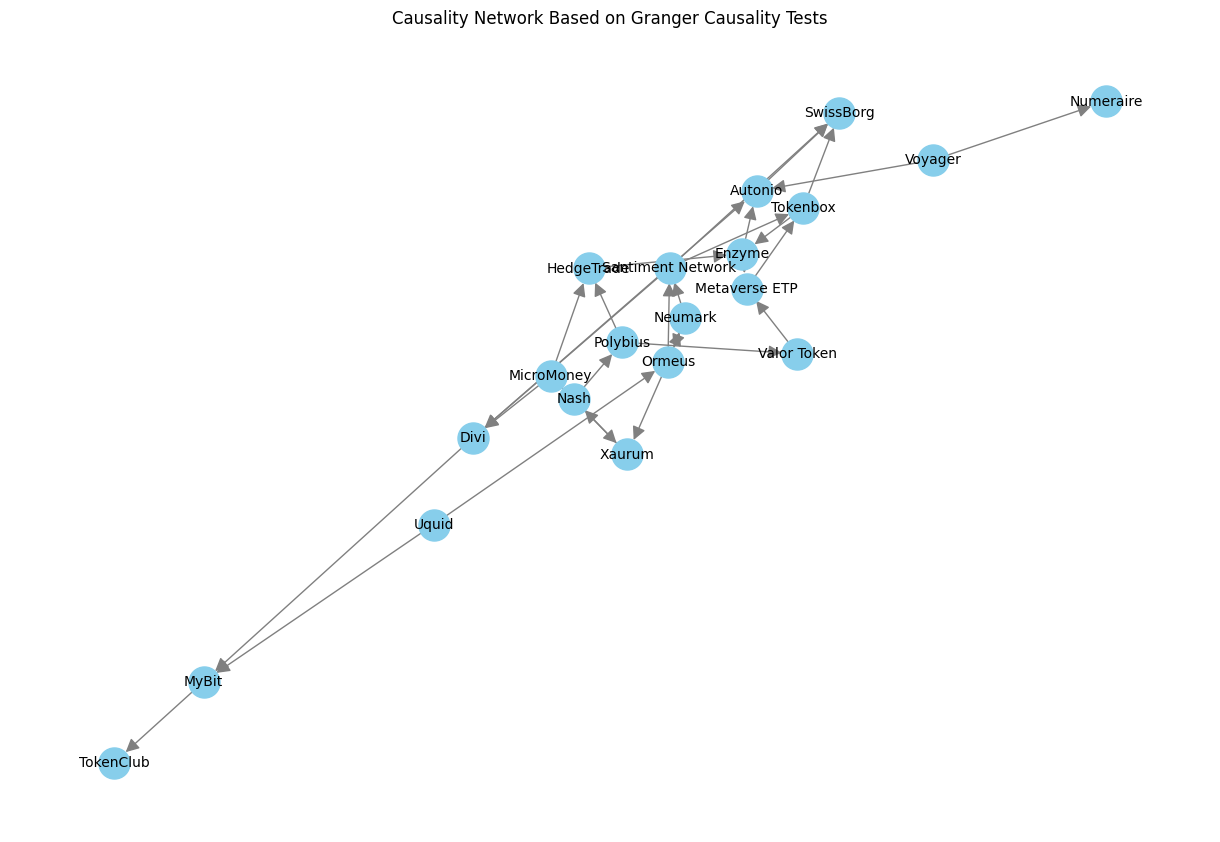

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph for the causality network
G = nx.DiGraph()

# Add edges for significant Granger causality pairs
for pair in causalityPair:
    G.add_edge(pair[0], pair[1])

# Draw the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.2, iterations=50)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray', arrowsize=20, font_size=10)

plt.title('Causality Network Based on Granger Causality Tests')
plt.show()


Method II

In [25]:
def multivariate_granger_causality_analysis(data, max_lag=2, threshold=0.05):
    causality_matrix = pd.DataFrame(index=data.columns, columns=data.columns, dtype=float)

    # Fit VAR model
    model = VAR(data)
    results = model.fit(maxlags=max_lag, ic='aic')

    # Perform Granger causality tests
    for target in data.columns:
        for feature in data.columns:
            if target != feature:
                # Perform Granger causality test for each pair of variables
                test_result = results.test_causality(target, [feature], kind='f')
                # Extract the chi-square statistic
                chi2_statistic = test_result.test_statistic.round(3)
                # Store chi-square statistic in the causality matrix
                causality_matrix.loc[target, feature] = chi2_statistic

    return causality_matrix

# Load your data into a DataFrame (assuming your data is loaded as 'data')

# Perform Multivariate Granger causality analysis
causality_matrix = multivariate_granger_causality_analysis(data)

print("Causality Matrix:")
print(causality_matrix)

Causality Matrix:
                   Xaurum   MyBit  Santiment Network  Wings  HedgeTrade  \
Xaurum                NaN   0.000              0.146  1.216       2.280   
MyBit               0.537     NaN              1.799  0.012       0.786   
Santiment Network   0.257   0.004                NaN  0.138       2.615   
Wings               2.354   0.271              0.619    NaN       0.075   
HedgeTrade          0.524   0.247              0.634  0.235         NaN   
Polybius            0.649   2.240              0.033  1.048       4.331   
Ormeus              4.645   0.008              9.652  0.049       0.254   
MicroMoney          6.288   3.013              2.727  0.087       4.104   
Neumark             0.864   1.647              5.182  0.151       0.115   
SwissBorg           0.032   0.340              0.188  1.374       0.788   
Numeraire           1.058   0.146              1.535  0.223       0.585   
Uquid               0.515  23.973              2.417  0.041       0.758   
Wirex  

In [26]:
# Set a threshold for significant causality (you can adjust this threshold as needed)
threshold_chi2 = 3.84  # For a significance level of 0.05 with 1 degree of freedom

# Iterate through the causality matrix to identify pairs with significant Granger causality
significant_pairs = []
for target in causality_matrix.index:
    for feature in causality_matrix.columns:
        if target != feature:
            chi2_statistic = causality_matrix.loc[target, feature]
            if chi2_statistic > threshold_chi2:
                significant_pairs.append((target, feature, chi2_statistic))

# Print the pairs with significant Granger causality
print("Pairs with significant Granger causality:")
for pair in significant_pairs:
    print(f"{pair[0]} -> {pair[1]} (Chi-square statistic: {pair[2]})")


Pairs with significant Granger causality:
Xaurum -> Nash (Chi-square statistic: 5.664)
MyBit -> TokenClub (Chi-square statistic: 7.783)
Santiment Network -> SwissBorg (Chi-square statistic: 5.307)
Santiment Network -> Divi (Chi-square statistic: 9.159)
Santiment Network -> Tokenbox (Chi-square statistic: 14.51)
HedgeTrade -> Enzyme (Chi-square statistic: 9.837)
Polybius -> HedgeTrade (Chi-square statistic: 4.331)
Polybius -> Valor Token (Chi-square statistic: 502.777)
Ormeus -> Xaurum (Chi-square statistic: 4.645)
Ormeus -> Santiment Network (Chi-square statistic: 9.652)
Ormeus -> Neumark (Chi-square statistic: 5.462)
MicroMoney -> Xaurum (Chi-square statistic: 6.288)
MicroMoney -> HedgeTrade (Chi-square statistic: 4.104)
MicroMoney -> Divi (Chi-square statistic: 5.443)
MicroMoney -> Nash (Chi-square statistic: 5.809)
Neumark -> Santiment Network (Chi-square statistic: 5.182)
Neumark -> Ormeus (Chi-square statistic: 5.926)
Uquid -> MyBit (Chi-square statistic: 23.973)
Uquid -> Ormeus (

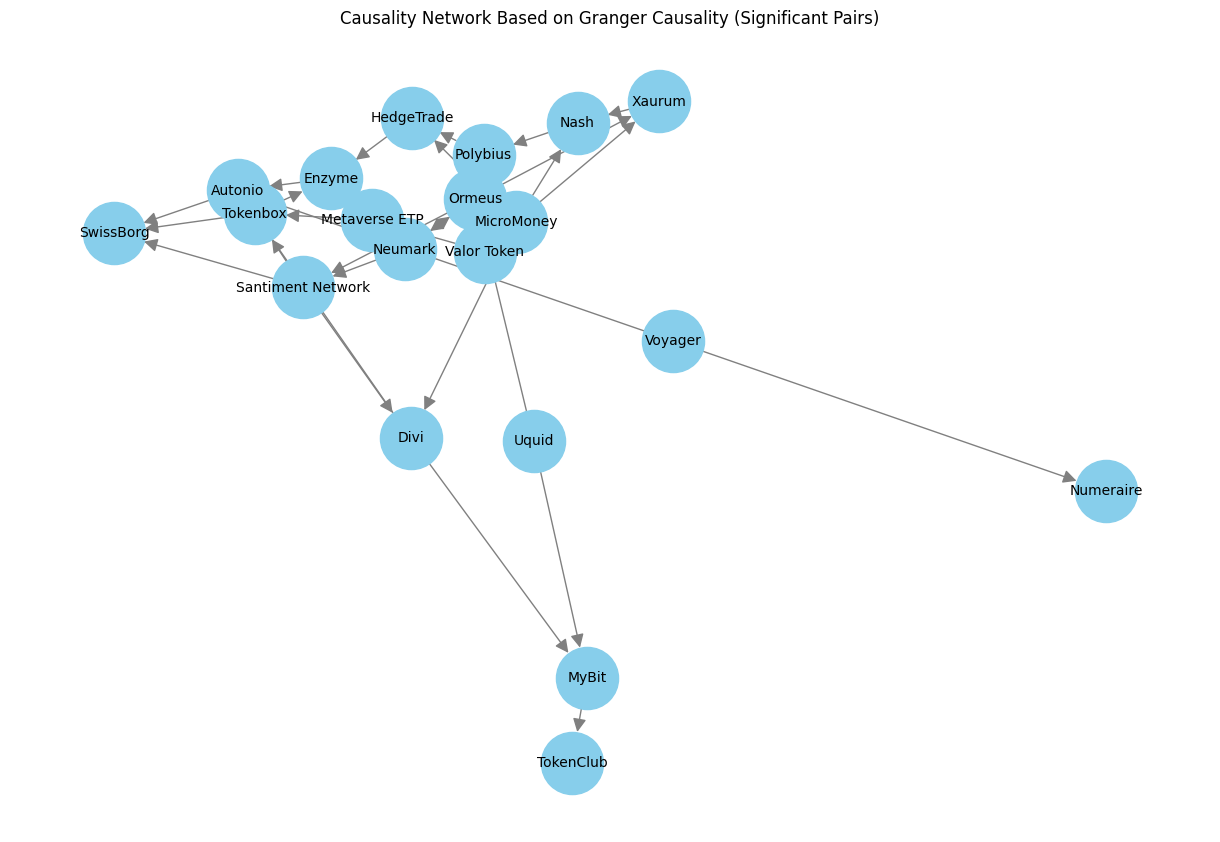

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty directed graph
G = nx.DiGraph()

# Add edges for significant pairs with Granger causality
for pair in significant_pairs:
    target, feature, chi2_statistic = pair
    G.add_edge(target, feature, chi2_statistic=chi2_statistic)

# Draw the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.2, iterations=50)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', arrowsize=20, font_size=10)

# Draw edge labels
# edge_labels = nx.get_edge_attributes(G, 'chi2_statistic')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Causality Network Based on Granger Causality (Significant Pairs)')
plt.show()
